In [48]:
# developed by Shivam Jumani for PUI in 2018, with help from Dr. Bianco's homework example.
# example of gathering, reading, and plotting data
import os
puidata = os.getenv("PUIDATA")
print(puidata)

/nfshome/spj237/PUIdata


In [49]:
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/

In [50]:
from __future__ import print_function

In [51]:
!curl https://data.cityofnewyork.us/api/views/hu6m-9cfi/rows.csv?accessType=DOWNLOAD > building.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  321k    0  321k    0     0   711k      0 --:--:-- --:--:-- --:--:--  713k


In [52]:
import os
!mv building.csv $PUIDATA

In [53]:
ls $PUIDATA

building.csv  dhsdaily.csv  energydata.csv


In [54]:
#read in the data with pandas
import pandas as pd
building = pd.read_csv("%s/building.csv"%os.getenv("PUIDATA"))

In [55]:
building.head(3)

,ProjectBuildingDWID,ProjectID,BuildingID,BoroID,Block,Lot,BIN,HouseNumber,StreetName,TotalBuildingUnits,...,BBL,Community Board,Council District,Census Tract,NTA,Latitude,Longitude,Latitude (Internal),Longitude (Internal),Postcode
0,72130,48887,57693.0,2,3737.0,37.0,2023761.0,1160.0,COLGATE AVENUE,17.0,...,2.037370e+09,9.0,17.0,52.0,BX55,40.827218,-73.881706,40.827909,-73.881593,10472.0
1,70927,48755,72098.0,2,5000.0,1.0,2068251.0,855.0,EAST 233 STREET,108.0,...,2.050000e+09,12.0,12.0,430.0,BX62,40.891940,-73.852775,40.892115,-73.852507,10466.0
2,69203,49270,947270.0,1,779.0,7.0,1014279.0,257.0,WEST 29 STREET,37.0,...,1.007790e+09,5.0,3.0,95.0,MN17,40.748521,-73.994464,40.749020,-73.995106,10001.0


In [56]:
building.tail(3)

,ProjectBuildingDWID,ProjectID,BuildingID,BoroID,Block,Lot,BIN,HouseNumber,StreetName,TotalBuildingUnits,...,BBL,Community Board,Council District,Census Tract,NTA,Latitude,Longitude,Latitude (Internal),Longitude (Internal),Postcode
1973,396147,55428,805037.0,1,1622.0,17.0,1080650.0,1772.0,MADISON AVENUE,NaN,...,1.016220e+09,11.0,9.0,184.0,MN34,40.800312,-73.944623,40.800694,-73.945085,10035.0
1974,396146,55428,64060.0,2,2359.0,210.0,2001152.0,510.0,EAST 156 STREET,NaN,...,2.023590e+09,1.0,17.0,71.0,BX34,40.819523,-73.911458,40.818996,-73.911459,10455.0
1975,396148,55396,746078.0,5,1272.0,11.0,5109139.0,85.0,HOLLAND AVENUE,536.0,...,5.012720e+09,1.0,49.0,31902.0,SI12,40.638542,-74.171232,40.639104,-74.170235,10303.0


In [57]:
building.columns

Index(['ProjectBuildingDWID', 'ProjectID', 'BuildingID', 'BoroID', 'Block',
       'Lot', 'BIN', 'HouseNumber', 'StreetName', 'TotalBuildingUnits',
       'BaseSquareFootage', 'Stories', 'BBL', 'Community Board',
       'Council District', 'Census Tract', 'NTA', 'Latitude', 'Longitude',
       'Latitude (Internal)', 'Longitude (Internal)', 'Postcode'],
      dtype='object')

In [58]:
building.size

43472

In [59]:
building_2c = building[['TotalBuildingUnits','Stories']]

In [60]:
building_2c.head()

,TotalBuildingUnits,Stories
0,17.0,4.0
1,108.0,12.0
2,37.0,14.0
3,7.0,4.0
4,11.0,5.0


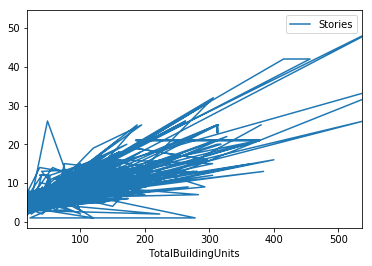

In [61]:
building_2c.plot(x="TotalBuildingUnits", y="Stories")

In [62]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


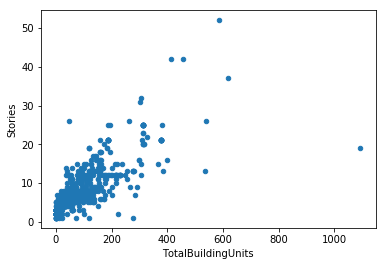

In [63]:
building.plot(x= "TotalBuildingUnits", y="Stories", kind = 'scatter')

Figure 1: the number of stories against the total units for buildings that receive financial assistance from the Department of Housing Preservation and Development. This shows a positive correlation between building units and number of stories